# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2023

Мягий дедлайн: 23:59 12.12.2023

Жестокий дедлайн: 23:59 14.12.2023

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/56884/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [3]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [4]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

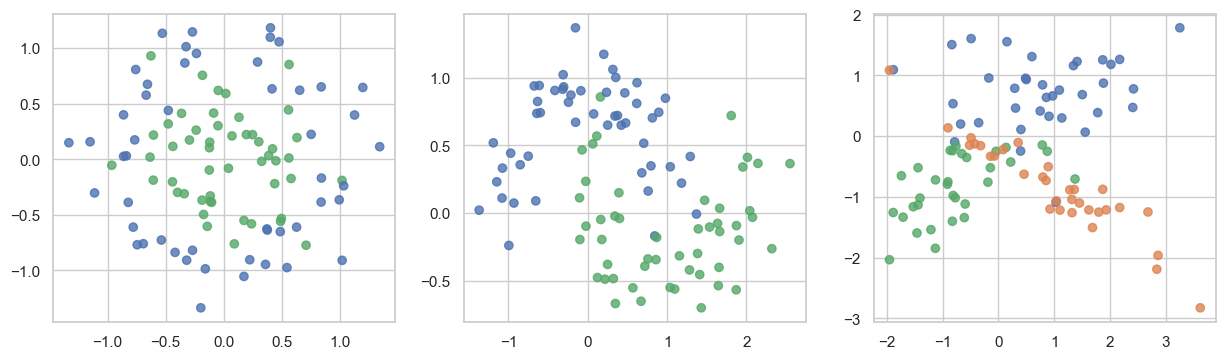

In [5]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [7]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

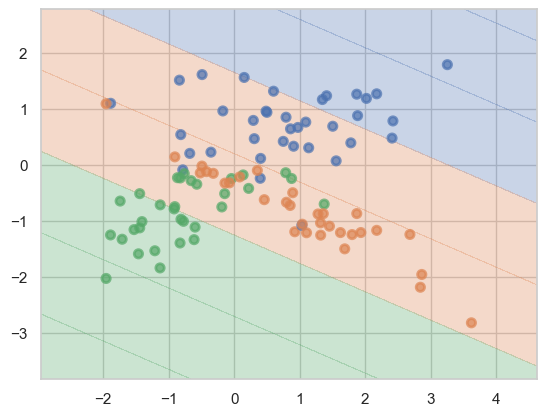

In [8]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

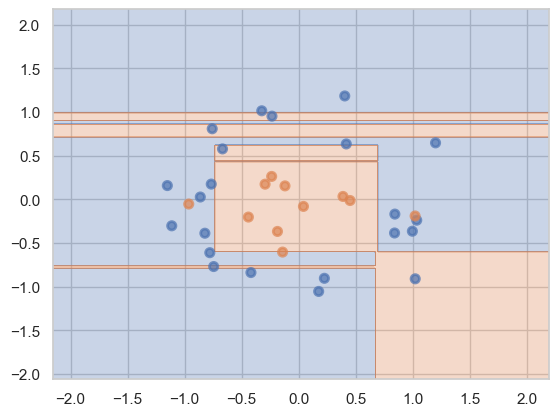

In [35]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X0, y0 = datasets[0]
X_train0, X_test0, y_train0, y_test0 = train_test_split(X0, y0, test_size=0.33, random_state=42)
clf0 = DecisionTreeClassifier(random_state=42).fit(X_train0, y_train0)
plot_surface(clf0, X_test0, y_test0)


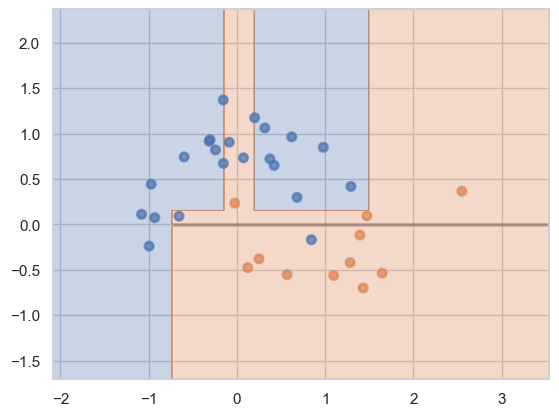

In [30]:
X1, y1 = datasets[1]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.33, random_state=42)
clf1 = DecisionTreeClassifier(random_state=42).fit(X_train1, y_train1)
plot_surface(clf1, X_test1, y_test1)

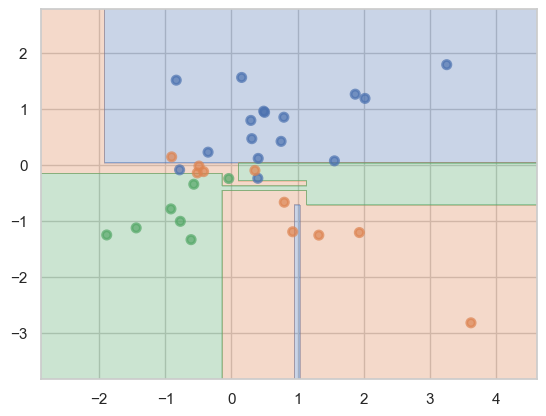

In [31]:
X2, y2 = datasets[2]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33, random_state=42)
clf2 = DecisionTreeClassifier(random_state=42).fit(X_train2, y_train2)
plot_surface(clf2, X_test2, y_test2)

In [33]:
from sklearn.metrics import accuracy_score

print(f"Dataset 0 : train accuracy = {accuracy_score(y_train0, clf0.predict(X_train0))}, Dataset 0 : test accuracy = {accuracy_score(y_test0, clf0.predict(X_test0))}")
print(f"Dataset 1 : train accuracy = {accuracy_score(y_train1, clf1.predict(X_train1))}, Dataset 1 : test accuracy = {accuracy_score(y_test1, clf1.predict(X_test1))}")
print(f"Dataset 2 : train accuracy = {accuracy_score(y_train2, clf2.predict(X_train2))}, Dataset 2 : test accuracy = {accuracy_score(y_test2, clf2.predict(X_test2))}")

Dataset 0 : train accuracy = 1.0, Dataset 0 : test accuracy = 0.7575757575757576
Dataset 1 : train accuracy = 1.0, Dataset 1 : test accuracy = 0.8787878787878788
Dataset 2 : train accuracy = 1.0, Dataset 2 : test accuracy = 0.8484848484848485


__Ответ:__

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

Dataset 2 : train accuracy = 0.9402985074626866, Dataset 2 : test accuracy = 0.8787878787878788


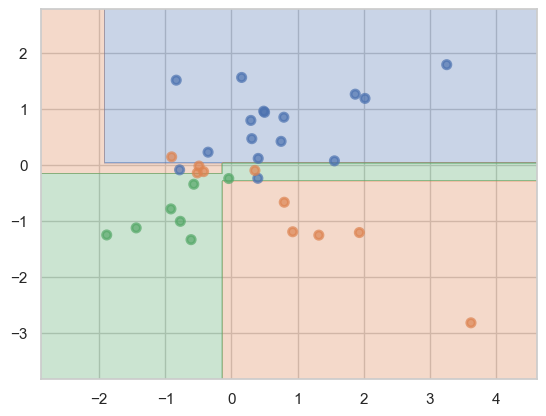

In [41]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X2, y2 = datasets[2]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33, random_state=42)
clf2 = DecisionTreeClassifier(random_state=42, max_depth=3).fit(X_train2, y_train2)
print(f"Dataset 2 : train accuracy = {accuracy_score(y_train2, clf2.predict(X_train2))}, Dataset 2 : test accuracy = {accuracy_score(y_test2, clf2.predict(X_test2))}")
plot_surface(clf2, X_test2, y_test2)

Dataset 2 : train accuracy = 0.9104477611940298, Dataset 2 : test accuracy = 0.7878787878787878


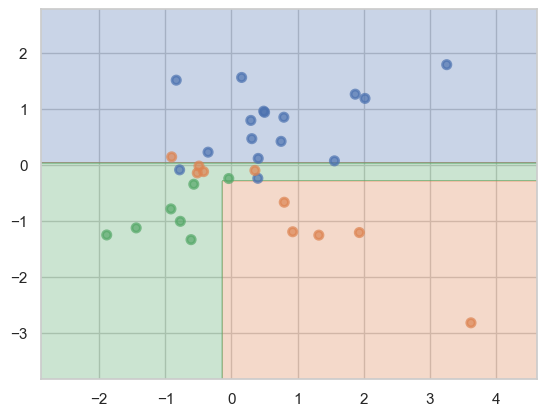

In [48]:
X2, y2 = datasets[2]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33, random_state=42)
clf2 = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_leaf=3).fit(X_train2, y_train2)
print(f"Dataset 2 : train accuracy = {accuracy_score(y_train2, clf2.predict(X_train2))}, Dataset 2 : test accuracy = {accuracy_score(y_test2, clf2.predict(X_test2))}")
plot_surface(clf2, X_test2, y_test2)

__Ответ:__

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [105]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
students = pd.read_csv('students.csv')
students

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,1
254,0.78,0.61,0.71,0.19,0.60,1
255,0.54,0.82,0.71,0.29,0.77,1
256,0.50,0.75,0.81,0.61,0.26,1


In [106]:
def find_best_split(feature_vector, target_vector):
    """
    Под критерием Джини здесь подразумевается следующая функция:
    $$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
    $R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
     $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

    Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини нужно выбирать минимальный сплит.
    * За наличие в функции циклов балл будет снижен. Векторизуйте! :)

    :param feature_vector: вещественнозначный вектор значений признака
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)

    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
     разделить на две различные подвыборки, или поддерева
    :return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best: оптимальное значение критерия Джини (число)
    """
    # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

    sorted_feature_vector = np.sort(feature_vector)
    thresholds = 0.5 * (sorted_feature_vector[:-1] + sorted_feature_vector[1:])
    thresholds2 = np.tile(thresholds, (feature_vector.size, 1)).T
    feature_vectors = np.tile(feature_vector, (thresholds.size, 1))
    target_vectors = np.tile(target_vector, (thresholds.size, 1))

    left_subtrees = feature_vectors < thresholds2
    right_subtrees = feature_vectors > thresholds2

    left_nodes = np.where(left_subtrees, feature_vectors, np.nan)
    right_nodes = np.where(right_subtrees, feature_vectors, np.nan)

    def gini(left, right, target):
        p0_left = np.where((~np.isnan(left)), target, np.nan)
        p0_right = np.where((~np.isnan(right)), target, np.nan)

        def count_zeros_ones(row):
            counts = np.bincount(row[~np.isnan(row)].astype(int))
            num_zeros = counts[0] if len(counts) > 1 else 0
            num_ones = counts[1] if len(counts) > 1 else 0
            return (num_zeros, num_ones)

        counts_left = np.apply_along_axis(count_zeros_ones, axis=1, arr=p0_left)
        counts_right = np.apply_along_axis(count_zeros_ones, axis=1, arr=p0_right)

        r_l = np.sum(counts_left, axis=1)
        r_r = np.sum(counts_right, axis=1)
        r = r_l + r_r

        p0_left_probas = counts_left[:, 0] / r_l
        p1_left_probas = np.ones(p0_left_probas.shape) - p0_left_probas
        p0_right_probas = counts_right[:, 0] / r_r
        p1_right_probas = np.ones(p0_right_probas.shape) - p0_right_probas

        h_l = np.ones(p0_left_probas.shape) - p0_left_probas ** 2 - p1_left_probas ** 2
        h_r = np.ones(p0_right_probas.shape) - p0_right_probas ** 2 - p1_right_probas ** 2

        ginis = -r_l / r * h_l - r_r / r * h_r
        return ginis

    ginis = gini(left_nodes, right_nodes, target_vectors)
    gini_best = np.max(ginis)
    threshold_best = thresholds[np.argmax(ginis)]
    return thresholds, ginis, threshold_best, gini_best


In [109]:
feature_columns = students.columns.values[:-1]
target = students["UNS"]
stg, scg, strc, lpr, peg = students[feature_columns].T.to_numpy()
students

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,1
254,0.78,0.61,0.71,0.19,0.60,1
255,0.54,0.82,0.71,0.29,0.77,1
256,0.50,0.75,0.81,0.61,0.26,1


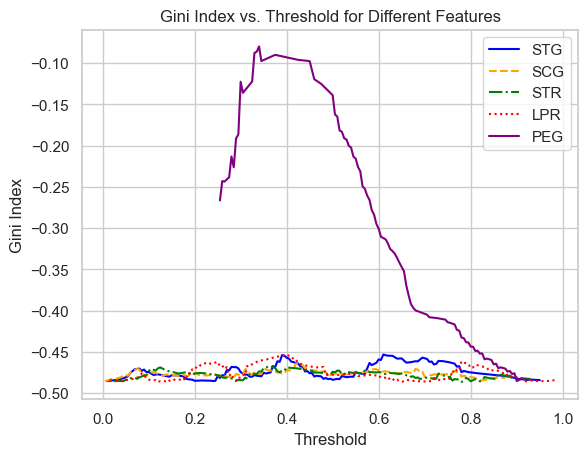

In [108]:
# Задаем цвета и стили линий для графиков
colors = ['blue', 'orange', 'green', 'red', 'purple']
linestyles = ['-', '--', '-.', ':', '-']

# Цикл по признакам для построения графиков
for i, f in enumerate([stg, scg, strc, lpr, peg]):
    thresholds, ginis, threshold_best, gini_best = find_best_split(f, target)
    plt.plot(thresholds, ginis, label=f'{feature_columns[i]}', color=colors[i], linestyle=linestyles[i])

# Добавляем подписи осей и легенду
plt.xlabel('Threshold')
plt.ylabel('Gini Index')
plt.legend()
plt.title('Gini Index vs. Threshold for Different Features')

# Отображаем график
plt.show()

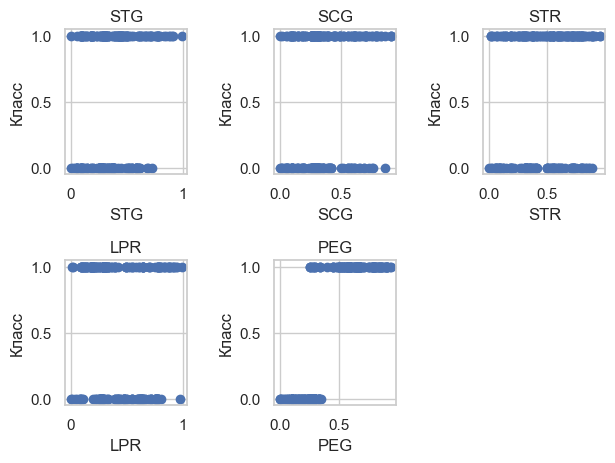

In [104]:
for i, (f, name) in enumerate(zip([stg, scg, strc, lpr, peg], feature_columns), 1):
    plt.subplot(2, 3, i)
    plt.scatter(f, target)
    plt.title(f"{name}")
    plt.xlabel(name)
    plt.ylabel('Класс')

plt.tight_layout()
plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** делить надо по PEG так как у его кривой есть явный максимум, деление по нему приведет к наилучшему снижению неоднородности в данных. Также этот вывод напрашивается из вида scatter-графиков. Кривая для "хороших" должна иметь явный пик и чем больше максимум, тем лучше поделится по этому и признаку и этому порогу дерево.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

In [526]:
from sklearn.base import ClassifierMixin
from sklearn.base import BaseEstimator

In [527]:
def find_best_split(feature_vector, target_vector):
    """
    Под критерием Джини здесь подразумевается следующая функция:
    $$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
    $R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
     $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

    Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини нужно выбирать минимальный сплит.
    * За наличие в функции циклов балл будет снижен. Векторизуйте! :)

    :param feature_vector: вещественнозначный вектор значений признака
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)

    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
     разделить на две различные подвыборки, или поддерева
    :return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best: оптимальное значение критерия Джини (число)
    """
    # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    if feature_vector.size == 1:
        return np.array([]), np.array([]), None, None

    sorted_feature_vector = np.sort(feature_vector)
    thresholds = 0.5 * (sorted_feature_vector[:-1] + sorted_feature_vector[1:])
    thresholds = thresholds[thresholds > sorted_feature_vector[0]]
    thresholds = thresholds[thresholds < sorted_feature_vector[-1]]
    thresholds2 = np.tile(thresholds, (feature_vector.size, 1)).T
    feature_vectors = np.tile(feature_vector, (thresholds.size, 1))
    target_vectors = np.tile(target_vector, (thresholds.size, 1))

    left_subtrees = feature_vectors < thresholds2
    right_subtrees = feature_vectors > thresholds2

    left_nodes = np.where(left_subtrees, feature_vectors, np.nan)
    right_nodes = np.where(right_subtrees, feature_vectors, np.nan)

    def gini(left, right, target):
        p0_left = np.where((~np.isnan(left)), target, np.nan)
        p0_right = np.where((~np.isnan(right)), target, np.nan)

        def count_zeros_ones(row):
            counts = np.bincount(row[~np.isnan(row)].astype(int))
            num_zeros = counts[0] if len(counts) > 1 else 0
            num_ones = counts[1] if len(counts) > 1 else 0
            return (num_zeros, num_ones)

        counts_left = np.apply_along_axis(count_zeros_ones, axis=1, arr=p0_left)
        counts_right = np.apply_along_axis(count_zeros_ones, axis=1, arr=p0_right)

        r_l = np.sum(counts_left, axis=1)
        r_r = np.sum(counts_right, axis=1)
        r = r_l + r_r

        nonzero_indices = np.where(r != 0)[0]  # Находим индексы, в которых r не равно 0

        r_l = r_l[nonzero_indices][:, np.newaxis]
        r_r = r_r[nonzero_indices][:, np.newaxis]
        r = r[nonzero_indices][:, np.newaxis]
        
        counts_left = counts_left[nonzero_indices]
        counts_right = counts_right[nonzero_indices]
        p0_left_probas = counts_left /  r_l
        p1_left_probas = 1 - p0_left_probas
        p0_right_probas = counts_right /  r_r
        p1_right_probas = 1 - p0_right_probas

        h_l = np.ones(p0_left_probas.shape) - p0_left_probas ** 2 - p1_left_probas ** 2
        h_r = np.ones(p0_right_probas.shape) - p0_right_probas ** 2 - p1_right_probas ** 2
        ginis = -r_l / r * h_l - r_r / r * h_r
        return ginis

    ginis = gini(left_nodes, right_nodes, target_vectors)
    if ginis.size > 0:
        ginis = ginis[:, 0]
        gini_best = np.max(ginis)
        threshold_best = thresholds[np.argmax(ginis)]
        return thresholds, ginis, threshold_best, gini_best
    return np.array([]), np.array([]), None, None

In [548]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
class DecisionTree(BaseEstimator):
    def __init__(self, feature_types, max_depth=None, min_samples_split=1, min_samples_leaf=1):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

    def get_params(self, deep=True):
        return {"feature_types": self._feature_types, "max_depth": self._max_depth, "min_samples_split": self._min_samples_split, 
            "min_samples_leaf": self._min_samples_leaf}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self
    
    def _fit_node(self, sub_X, sub_y, node, current_depth):
        if np.all(sub_y != sub_y[0]):
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(0, sub_X.shape[1]):
            feature_type = self._feature_types[feature]
            categories_map = {}
            if feature_type == "real":
                feature_vector = np.array(sub_X[:, feature], dtype=np.float64)
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                        ratio[key] = current_count / current_click
                    else:
                        ratio[key] = 0
                sorted_categories = list(map(lambda x: x[1], sorted(ratio.items(), key=lambda x: x[1])))
                categories_map = dict(map(lambda x: x[0], zip(sorted(ratio.items(), key=lambda x: x[1]),
                                                              list(range(len(sorted_categories))))))
                feature_vector = np.array(list(map(lambda x: categories_map[x], sub_X[:, feature])))
            else:
                raise ValueError

            if len(np.unique(feature_vector)) == 1:
                continue

            _, _, threshold, gini = find_best_split(feature_vector, sub_y)

            if threshold is None or sub_y.size < self._min_samples_leaf:
                continue
            
            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold
                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "categorical":
                    threshold_best = list(map(lambda x: x[0],
                                              filter(lambda x: x[1] < threshold, categories_map.items())))
                else:
                    raise ValueError

        if feature_best is None or current_depth==0 or sub_y.size <= self._min_samples_split:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
            node["feature_type"] = "real"
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
            node["feature_type"] = "categorical"
        else:
            raise ValueError

        current_depth-=1
        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"], current_depth)
        self._fit_node(sub_X[np.logical_not(split)], sub_y[np.logical_not(split)], node["right_child"], current_depth)

    def _predict_node(self, x, node):
        # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        if node["type"] == "terminal":
            return node["class"]
        if node["feature_type"] == "real":
            if float(x[node["feature_split"]]) < float(node["threshold"]):
                return self._predict_node(x, node["left_child"])
            if float(x[node["feature_split"]]) >= float(node["threshold"]):
                return self._predict_node(x, node["right_child"])
        if node["feature_type"] == "categorical":
            if x[node["feature_split"]] in node["categories_split"]:
                return self._predict_node(x, node["left_child"])
            if x[node["feature_split"]] not in node["categories_split"]:
                return self._predict_node(x, node["right_child"])

    def fit(self, X, y):
        if not self._max_depth:
            self._max_depth = y.size * X.shape[1]
        if type(X) is not np.ndarray:
            X = X.to_numpy()
        self._min_samples_split = self._min_samples_split if type(self._min_samples_split) is int else np.ceil(self._min_samples_split * y.size)
        self._min_samples_leaf = self._min_samples_leaf if type(self._min_samples_leaf) is int else np.ceil(self._min_samples_leaf * y.size)
        
        self._fit_node(X, y, self._tree, self._max_depth)
        return self

    def predict(self, X):
        if type(X) is not np.ndarray:
            X = X.to_numpy()
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)



__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [481]:
mushrooms = pd.read_csv('agaricus-lepiota.data', sep=",", header=None)
features_mushrooms = mushrooms.iloc[:,1:]
feature_mushrooms_column_names = features_mushrooms.columns.values
target = mushrooms.iloc[:, 0]

mushrooms

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [482]:
from sklearn.preprocessing import LabelEncoder
for column in feature_mushrooms_column_names:
    features_mushrooms[column] = LabelEncoder().fit_transform(features_mushrooms[column]) 

target_mushrooms = LabelEncoder().fit_transform(target)
features_mushrooms

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [483]:
from sklearn.model_selection import train_test_split

X_train_mushrooms, X_test_mushrooms, y_train_mushrooms, y_test_mushrooms = train_test_split(features_mushrooms, target_mushrooms, test_size=0.5, random_state=42)

In [543]:
from sklearn.metrics import accuracy_score
from collections import Counter

feature_types_mushrooms = ["real"] * feature_mushrooms_column_names.size
clf = DecisionTree(feature_types_mushrooms)
clf.fit(X_train_mushrooms, y_train_mushrooms)
accuracy_score(y_test_mushrooms, clf.predict(X_test_mushrooms))

0.9933530280649926

__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

In [547]:
clf2 = DecisionTree(feature_types_mushrooms, min_samples_leaf=200)
clf2.fit(X_train_mushrooms, y_train_mushrooms)
prediction_train_mushrooms = clf2.predict(X_train_mushrooms)
prediction_test_mushrooms = clf2.predict(X_test_mushrooms)
print("accuracy_train: ", accuracy_score(y_train_mushrooms, prediction_train_mushrooms))
print("accuracy_test: ", accuracy_score(y_test_mushrooms, prediction_test_mushrooms))

accuracy_train:  0.9687346134908912
accuracy_test:  0.9618414574101428


In [486]:
tic_tac = pd.read_csv("tic-tac-toe-endgame.csv")
features_tic_tac = tic_tac.iloc[:,:-1]
feature_tic_tac_column_names = features_tic_tac.columns.values
target_tic_tac = tic_tac.iloc[:, -1]
target_tic_tac = LabelEncoder().fit_transform(target_tic_tac)
feature_types_tic_tac = ["categorical"] * feature_tic_tac_column_names.size
X_train_tic_tac, X_test_tic_tac, y_train_tic_tac, y_test_tic_tac = train_test_split(features_tic_tac, target_tic_tac, test_size=0.5, random_state=42)


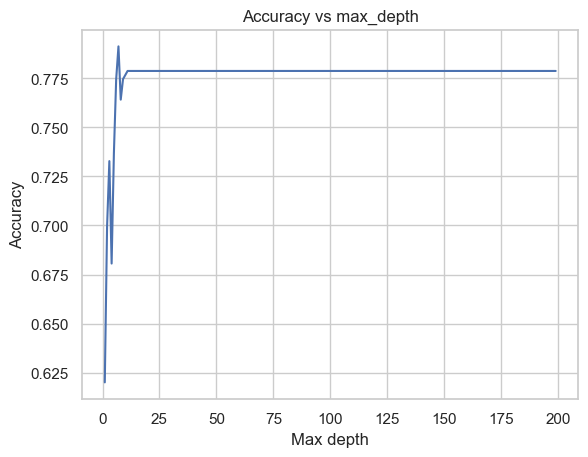

In [549]:
accuracies = {}
for md in range(1, 200):
    clf3 = DecisionTree(feature_types_tic_tac, max_depth=md)
    clf3.fit(X_train_tic_tac, y_train_tic_tac)
    prediction_train = clf3.predict(X_train_tic_tac)
    prediction_test = clf3.predict(X_test_tic_tac)
    accuracies[md] =  accuracy_score(y_test_tic_tac, prediction_test)

plt.plot(accuracies.keys(), accuracies.values())
plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.title(f"Accuracy vs max_depth")
plt.show()

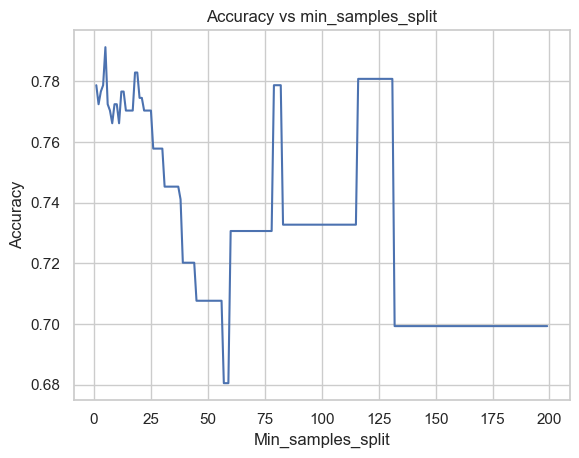

In [550]:
accuracies = {}
for md in range(1, 200):
    clf3 = DecisionTree(feature_types_tic_tac, min_samples_split=md)
    clf3.fit(X_train_tic_tac, y_train_tic_tac)
    prediction_train = clf3.predict(X_train_tic_tac)
    prediction_test = clf3.predict(X_test_tic_tac)
    accuracies[md] =  accuracy_score(y_test_tic_tac, prediction_test)

plt.plot(accuracies.keys(), accuracies.values())
plt.xlabel("Min_samples_split")
plt.ylabel("Accuracy")
plt.title(f"Accuracy vs min_samples_split")
plt.show()

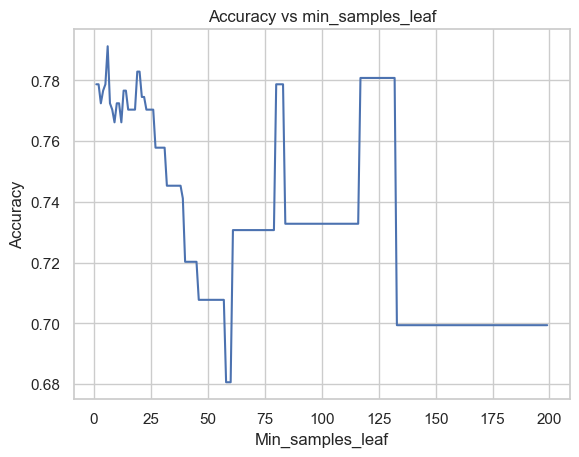

In [551]:
accuracies = {}
for md in range(1, 200):
    clf3 = DecisionTree(feature_types_tic_tac, min_samples_leaf=md)
    clf3.fit(X_train_tic_tac, y_train_tic_tac)
    prediction_train = clf3.predict(X_train_tic_tac)
    prediction_test = clf3.predict(X_test_tic_tac)
    accuracies[md] =  accuracy_score(y_test_tic_tac, prediction_test)

plt.plot(accuracies.keys(), accuracies.values())
plt.xlabel("Min_samples_leaf")
plt.ylabel("Accuracy")
plt.title(f"Accuracy vs min_samples_leaf")
plt.show()

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [517]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
mushrooms = pd.read_csv('agaricus-lepiota.data', sep=",", header=None)
features_mushrooms = mushrooms.iloc[:,1:]
feature_mushrooms_column_names = features_mushrooms.columns.values
target_mushrooms = mushrooms.iloc[:, 0]
target_mushrooms = LabelEncoder().fit_transform(target_mushrooms)
for column in feature_mushrooms_column_names:
    features_mushrooms[column] = LabelEncoder().fit_transform(features_mushrooms[column]) 

tic_tac = pd.read_csv("tic-tac-toe-endgame.csv")
features_tic_tac = tic_tac.iloc[:,:-1]
feature_tic_tac_column_names = features_tic_tac.columns.values
target_tic_tac = tic_tac.iloc[:, -1]
target_tic_tac = LabelEncoder().fit_transform(target_tic_tac)
for column in feature_tic_tac_column_names:
    features_tic_tac[column] = LabelEncoder().fit_transform(features_tic_tac[column]) 

cars = pd.read_csv('car.data', sep=",", header=None)
features_cars = cars.iloc[:,:-1]
feature_cars_column_names = features_cars.columns.values
target_cars = cars.iloc[:, -1]
target_cars = np.array([0 if x in ["unacc", "acc"] else 1 for x in target_cars])
for column in feature_cars_column_names:
    features_cars[column] = LabelEncoder().fit_transform(features_cars[column])

nursery = pd.read_csv('nursery.data', sep=",", header=None)
features_nursery = nursery.iloc[:,:-1]
feature_nursery_column_names = features_nursery.columns.values
target_nursery = nursery.iloc[:, -1]
target_nursery = np.array([0 if x in ["not_recom", "recommend"] else 1 for x in target_nursery])
for column in feature_nursery_column_names:
    features_nursery[column] = LabelEncoder().fit_transform(features_nursery[column])



In [518]:
features_nursery

,0,1,2,3,4,5,6,7
0,2,3,0,0,0,0,0,2
1,2,3,0,0,0,0,0,1
2,2,3,0,0,0,0,0,0
3,2,3,0,0,0,0,2,2
4,2,3,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...
12955,0,4,2,3,1,1,2,1
12956,0,4,2,3,1,1,2,0
12957,0,4,2,3,1,1,1,2
12958,0,4,2,3,1,1,1,1


In [564]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score

all_accuracies = []
for data in [[features_mushrooms, target_mushrooms], [features_tic_tac, target_tic_tac], [features_cars, target_cars], [features_nursery, target_nursery]]:
    feature_types_1 = ["real"] * data[0].shape[1]
    feature_types_2 = ["categorical"] * data[0].shape[1]

    data_OHE = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit_transform(data[0])
    clf1 = DecisionTree(feature_types_1)
    clf2 = DecisionTree(feature_types_2)
    clf3 = DecisionTree(["real"] * data_OHE.shape[1])
    clf4 = DecisionTreeClassifier(random_state=42)

    scorer = make_scorer(accuracy_score)

    accuracies = []
    accuracies.append(np.mean(cross_val_score(clf1, data[0], data[1], cv=10, scoring=scorer)))
    accuracies.append(np.mean(cross_val_score(clf2, data[0], data[1], cv=10, scoring=scorer)))
    accuracies.append(np.mean(cross_val_score(clf3, data_OHE, data[1], cv=10, scoring=scorer)))
    accuracies.append(np.mean(cross_val_score(clf4, data[0], data[1], cv=10, scoring=scorer)))
    all_accuracies.append(accuracies)

all_accuracies

[[0.9915030689715764,
  0.9970443349753694,
  0.995323226631281,
  0.9603836062991171],
 [0.3380153508771929,
  0.3589912280701754,
  0.43296052631578946,
  0.7716776315789474],
 [0.9367757763140206,
  0.9240993413093157,
  0.9014887753730341,
  0.9427073531388628],
 [0.9996913580246914,
  0.999537037037037,
  0.999537037037037,
  0.9996913580246914]]

In [565]:
results = pd.DataFrame(all_accuracies)
results

,0,1,2,3
0,0.991503,0.997044,0.995323,0.960384
1,0.338015,0.358991,0.432961,0.771678
2,0.936776,0.924099,0.901489,0.942707
3,0.999691,0.999537,0.999537,0.999691


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

Вставьте что угодно, описывающее ваши впечатления от этого задания: